In [6]:
import numpy as np
import pandas as pd

wbcd_dataset = pd.read_csv('./dataset/wbcd.data', header=None)
wdbc_dataset = pd.read_csv('./dataset/wdbc.data', header=None)

random_state = 0

In [7]:
wbcd_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [8]:
wdbc_dataset

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


missing val ids in wdbc_dataset: RangeIndex(start=0, stop=569, step=1)


## Data preprocessing

In [9]:
# wbcd_dataset
wbcd_dataset = wbcd_dataset.drop(0, axis=1)  # drop the id column
# if record contains ? value for any column (feature incomplete), delete the record
incomplete_records = []
for index, row in wbcd_dataset.iterrows():
    if '?' in row.values:
        incomplete_records.append(index)
wbcd_dataset = wbcd_dataset.drop(incomplete_records, axis=0)
print(f'removed {len(incomplete_records)} incomplete records: {incomplete_records}')

removed 16 incomplete records: [23, 40, 139, 145, 158, 164, 235, 249, 275, 292, 294, 297, 315, 321, 411, 617]


In [10]:
# wbcd partitioning
# 50-50
train_50 = wbcd_dataset.sample(frac=0.5, random_state=random_state)
test_50 = wbcd_dataset.drop(train_50.index)
# train_50 = wbcd_dataset.iloc[:len(wbcd_dataset) // 2]
# test_50 = wbcd_dataset.iloc[len(wbcd_dataset) // 2:]
# 60-40
train_60 = wbcd_dataset.sample(frac=0.6, random_state=random_state)
test_60 = wbcd_dataset.drop(train_60.index)
# 10-CV
train_10cv = wbcd_dataset.copy()
test_10cv = []
for i in range(10):
    test_10cv.append(train_10cv.sample(frac=0.1, random_state=(random_state + i)))

wbcd_partitioned = {
    '50-50': {
        'train': train_50,
        'test': test_50
    },
    '60-40': {
        'train': train_60,
        'test': test_60
    },
    '10-CV': {
        'train': train_10cv,
        'test': test_10cv
    }
}


def show_wbcd_statistic_data(dataset) -> None:
    print(f'number of records: {len(dataset)}')
    print(f'B: {len(dataset[dataset[10] == 2])}')
    print(f'M: {len(dataset[dataset[10] == 4])}')


for key, val in wbcd_partitioned.items():
    if key == '10-CV':
        print(f'10-CV')
        for i in range(10):
            print(f'fold {i + 1}')
            show_wbcd_statistic_data(val['test'][i])
    else:
        print(key)
        print('Train set')
        show_wbcd_statistic_data(val['train'])
        print('Test set')
        show_wbcd_statistic_data(val['test'])

50-50
Train set
number of records: 342
B: 219
M: 123
Test set
number of records: 341
B: 225
M: 116
60-40
Train set
number of records: 410
B: 268
M: 142
Test set
number of records: 273
B: 176
M: 97
10-CV
fold 1
number of records: 68
B: 46
M: 22
fold 2
number of records: 68
B: 43
M: 25
fold 3
number of records: 68
B: 42
M: 26
fold 4
number of records: 68
B: 38
M: 30
fold 5
number of records: 68
B: 45
M: 23
fold 6
number of records: 68
B: 46
M: 22
fold 7
number of records: 68
B: 43
M: 25
fold 8
number of records: 68
B: 44
M: 24
fold 9
number of records: 68
B: 42
M: 26
fold 10
number of records: 68
B: 37
M: 31


## Basic SVM

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score


def basic_svm_fit(partition: dict, c=None, sigma=None) -> tuple[float, float, float, float]:
    train = partition['train']
    test = partition['test']
    train_x = train.drop(10, axis=1)
    train_y = train[10]
    test_x = test.drop(10, axis=1)
    test_y = test[10]
    if sigma is not None:
        gamma = 1 / (sigma ** 2)
        svm = SVC(C=c, kernel='rbf', random_state=random_state, gamma=gamma)
    else:
        svm = SVC(kernel='rbf', random_state=random_state)
    svm.fit(train_x, train_y)
    pred_y = svm.predict(test_x)
    acc = accuracy_score(test_y, pred_y)
    tp, fp, fn, tn = confusion_matrix(test_y, pred_y).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(test_y, pred_y)
    return pred_y, acc, sensitivity, specificity, auc


# def basic_svm_fit_10cv(partition: dict) -> tuple[float, float, float, float]:

print('50-50')
c = np.random.randint(1, 1000)
sigma = np.random.randint(1, 100)
pred_y, acc, sensitivity, specificity, auc = basic_svm_fit(wbcd_partitioned['50-50'])
print(f'accuracy: {acc}, sensitivity: {sensitivity}, specificity: {specificity}, auc: {auc}, {pred_y}')

50-50
accuracy: 0.9794721407624634, sensitivity: 0.9866071428571429, specificity: 0.9658119658119658, auc: 0.9781800766283524, [2 2 4 2 2 2 2 2 2 2 4 2 2 2 2 2 2 4 2 4 4 4 2 4 4 4 4 4 4 2 4 4 2 4 2 4 2
 2 2 2 4 4 4 2 2 2 2 2 2 2 4 2 4 2 4 4 4 4 2 2 2 4 4 2 2 2 4 2 2 2 2 2 4 2
 2 4 2 4 4 2 2 4 2 4 2 4 2 2 4 4 2 2 4 4 4 2 4 2 2 2 4 2 2 4 2 2 4 4 4 2 4
 4 2 4 4 4 4 2 4 2 2 2 4 2 4 4 4 4 2 4 4 4 2 4 4 4 4 4 4 4 2 2 4 2 4 4 2 4
 2 4 2 4 2 2 4 2 4 2 2 4 4 2 4 2 2 4 2 2 4 2 2 2 4 4 4 2 2 4 2 2 2 2 2 2 2
 4 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 4 2 2 2 2 4 4 2 2 2 2 2 4 2 4 4 2
 2 2 2 4 2 2 2 2 4 2 2 4 4 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 2 4 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 4 2 4 4 4 4 2 2 2 2 2 4 4 2 2 4 4 2 4 2 2 2 2 2 4 2 2 2
 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 4 2 2 2 2 2 4 2 2
 2 2 2 2 2 2 2 2]


## Whales Optimization Algorithm

In [18]:
import matplotlib.pyplot as plt

# Initialize the parameters
# a. Foraging of prey
n = 50  # The population size of whales
num_classes = 2


def initialize_population(population_size: int, c_constraint=(1, 1000), sigma_constraint=(1, 100)) -> np.ndarray:
    """
    Initialize the whales population, each whale is represented by a vector of two elements (c, sigma). Both c and sigma are the hyperparameters of SVM.
    :param population_size: number of whales
    :param c_constraint: (C_min, C_max), default (1, 1000)
    :param sigma_constraint: (sigma_min, sigma_max), default (1, 100)
    :return: ndarray of shape (population_size, 2)
    """
    population = np.zeros((population_size, 2))
    for i in range(population_size):
        population[i][0] = np.random.randint(c_constraint[0], c_constraint[1])
        population[i][1] = np.random.randint(sigma_constraint[0], sigma_constraint[1])
    return population


def apply_constraint(whale, c_constraint=(1, 1000), sigma_constraint=(1, 100)) -> np.ndarray:
    """
    Apply the constraints to the whale
    :param whale: ndarray of shape (2,)
    :param c_constraint: (C_min, C_max), default (1, 1000)
    :param sigma_constraint: (sigma_min, sigma_max), default (1, 100)
    :return: ndarray of shape (2,)
    """
    whale[0] = np.clip(whale[0], c_constraint[0], c_constraint[1])
    whale[1] = np.clip(whale[1], sigma_constraint[0], sigma_constraint[1])
    return whale


In [19]:
rng = np.random.default_rng(seed=random_state)  # random number generator


def whale_optimization_algorithm(partition, population, max_iteration=50, b=2, a=0.25):
    """
    Whale Optimization Algorithm
    :param partition: dataset partition
    :param population: whales population
    :param max_iteration: maximum number of iterations
    :param b: variable used in Eq.2: linearly decreases from 2 (by default =2) to 0
    :param a: *Not mentioned default value in the paper* constant to determine the spiral shape.
    :return:
    """
    b_step = b / max_iteration
    current_iteration = 0

    fitness = np.array([basic_svm_fit(partition, c, sigma)[0] for c, sigma in population])
    best_whale = population[np.argmax(fitness)]
    while current_iteration < max_iteration:
        # using whales C and sigma to train SVMs and calculate the CA as fitness
        print(best_whale)
        for idx, whale in enumerate(population):
            t = rng.random()
            if t < 0.5:
                B = 2 * b * rng.random() - b
                if np.linalg.norm(B) < 1:
                    # update the position by Eq.1
                    population[idx] = whale - B * np.linalg.norm(2 * rng.random() * best_whale - whale)
                else:
                    # update the position by Eq.5
                    population[idx] = population[np.random.randint(0, len(population))] - B * np.linalg.norm(2 * rng.random() * best_whale - whale)
                    pass
            else:
                # update the position by Eq.4, t>=1
                l = rng.random()
                population[idx] = np.linalg.norm(best_whale - whale) * np.exp(a * l) * np.cos(2 * np.pi * l) + best_whale
            # check if any search agent goes beyond the search space and amend it.
            population[idx] = apply_constraint(population[idx])

        b -= b_step

        # update the fitness
        fitness = np.array([basic_svm_fit(partition, c, sigma)[0] for c, sigma in population])
        best_whale = population[np.argmax(fitness)]
        current_iteration += 1
        # Plot the population
        # plt.scatter(population[:, 0], population[:, 1], c='b')
        # plt.scatter(best_whale[0], best_whale[1], c='r')
        # plt.show()

    return best_whale


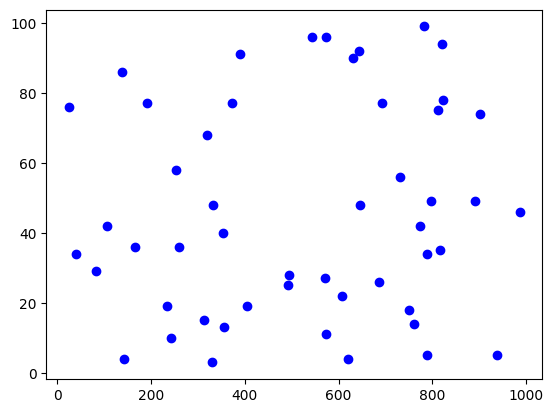

[986.  46.]
[986.  46.]
[321.28527593 100.        ]
[57.50722465 57.50722465]
[192.08319152  27.53708267]
[192.08319152  27.53708267]
[192.08319152  27.53708267]
[126.17216652  30.93541023]
[135.69333091  40.45657462]
[113.85332598  18.74475252]
[22.13308537 22.13308537]
[20.89479943 20.89479943]
[20.89479943 20.89479943]
[7.36488649 7.36488649]
[7.36488649 7.36488649]
[8.61627145 8.61627145]
[7.94439374 7.94439374]
[7.71272931 7.71272931]
[8.04456199 8.04456199]
[7.65707647 7.65707647]
[7.65707647 7.65707647]
[7.65707647 7.65707647]
[7.39905356 7.39905356]
[7.39905356 7.39905356]
[7.79193859 7.79193859]
[13.06936806 13.06936806]
[14.90635728 14.90635728]
[15.58493806 15.58493806]
[7.99024877 7.99024877]
[7.99024877 7.99024877]
[7.85025495 7.85025495]
[7.85025495 7.85025495]
[8.01398869 8.01398869]
[8.01398869 8.01398869]
[8.01398869 8.01398869]
[8.01398869 8.01398869]
[7.42530736 7.42530736]
[7.91475644 7.91475644]
[8.03928129 8.03928129]
[8.03928129 8.03928129]
[8.04765523 8.04765523

In [20]:
population = initialize_population(n)
plt.scatter(population[:, 0], population[:, 1], c='b')
plt.show()


best_whale = whale_optimization_algorithm(wbcd_partitioned['50-50'], population, a=1)
print(best_whale)
print(basic_svm_fit(wbcd_partitioned['50-50'], best_whale[0], best_whale[1]))